<a href="https://colab.research.google.com/github/Alamein/ArewaDS-Deep-Learning/blob/main/Advanced_Assignments/week_1_%26_2_Advanced_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(a) Load the Synchronous Machine Learning Dataset as a Numpy array.


In [1]:
import zipfile
import pandas as pd

# download dataset in colab env
!wget https://archive.ics.uci.edu/static/public/607/synchronous+machine+data+set.zip -O data.zip

# unzip data
with zipfile.ZipFile("data.zip", 'r') as my_zip:
    my_zip.extractall()

# read csv and parse to pandas
dataset_name = "synchronous machine.csv"
data = pd.read_csv(dataset_name, delimiter=";", thousands=',')

# get numpy data
numpy_data = data.values

--2023-12-31 17:07:45--  https://archive.ics.uci.edu/static/public/607/synchronous+machine+data+set.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘data.zip’

data.zip                [ <=>                ]  14.37K  --.-KB/s    in 0.03s   

2023-12-31 17:07:45 (552 KB/s) - ‘data.zip’ saved [14713]



(b) Convert the Numpy array to PyTorch tensor, original data tensor.

In [2]:
# import working library
import torch

original_data_tensor = torch.tensor(numpy_data)

Question 2. Art of "Tensor Manipulation"

(a) Print the size of the dataset.

In [3]:
print("Size of the dataset:", original_data_tensor.size())

Size of the dataset: torch.Size([557, 5])


(b) Create a tensor, my pi tensor, of the same size as the original data tensor containing values of 3.142 at every point and placed on your GPU device. Print the first 13 rows. Print tensor device location. Print tensor datatype.

In [4]:
# Hints: torch.ones_like(), .to(), .cuda(), .cpu(), .dtype
my_pi_tensor = torch.ones_like(original_data_tensor) * 3.142
my_pi_tensor = my_pi_tensor.to(device='cuda')  # Assuming GPU is available

print("First 13 rows of my pi tensor:\n", my_pi_tensor[:13, :])
print("Tensor device location:", my_pi_tensor.device)
print("Tensor datatype:", my_pi_tensor.dtype)

First 13 rows of my pi tensor:
 tensor([[3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420]], device='cuda:0')
Tensor device location: cuda:0
Tensor datatype: torch.float32


(c) Print the fifth-root of the sum of all values in my pi tensor.

In [10]:
fifth_root = torch.pow(my_pi_tensor.sum(), 1/5)
fifth_root_r = float(format(fifth_root, '.2f'))
print("Fifth-root of the sum of my pi tensor:", fifth_root)
# view pi tensor to 2dp
print("Fifth-root of the sum of my pi tensor:", fifth_root_r)

Fifth-root of the sum of my pi tensor: tensor(6.1434, device='cuda:0')
Fifth-root of the sum of my pi tensor: 6.14


(d) Create a new tensor, my data tensor, using the first and last 100 rows from the original data tensor. Print the size of my data tensor [Expect a size of 200 rows].

In [11]:
my_data_tensor = torch.cat([original_data_tensor[:100], original_data_tensor[-100:]])
print("Size of my data tensor:", my_data_tensor.size())

Size of my data tensor: torch.Size([200, 5])


(e) Create two 1-D tensors, features and target, from my data tensor. The feature is dIf (Changing of excitation current of synchronous machine) column, and the target is If (Excitation current of synchronous machine).

In [12]:
features = my_data_tensor[:, 0]  # Assuming the column index of dIf
target = my_data_tensor[:, 1]    # Assuming the column index of If

(f) Split your data into training and test data of ratio 75:25, respectively.

In [13]:
from sklearn.model_selection import train_test_split

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=42)

2. PyTorch Workflow Fundamentals

Question 3. Define your Linear model structure. You can use existing model

In [14]:
from re import X
import torch.nn as nn

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # Assuming one input feature and one output

    def forward(self, x):
        return self.linear(x)

Question 4. Train model for any number of epochs. Generate 1 plot of Loss against Epoch during model training and testing. Choose any set of hyperparameters for model training.

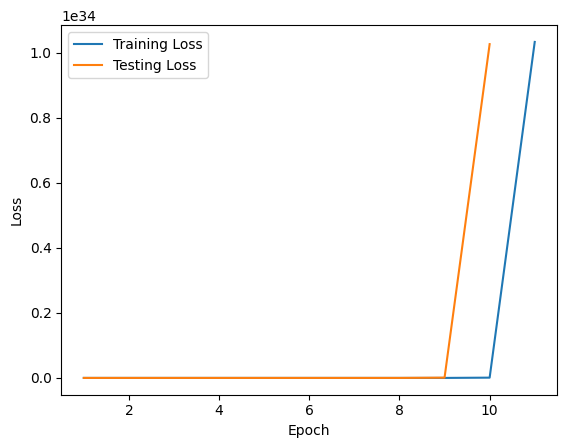

In [18]:
import torch.optim as optim
import matplotlib.pyplot as plt

# Assuming model, criterion, and data are defined
# Hints: torch.optim.SGD(), .backward(), .step(), .zero_grad(), .detach()

model = LinearRegressionModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

num_epochs = 100
train_losses, test_losses = [], []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(features_train.view(-1, 1).float())
    loss = criterion(outputs, target_train.view(-1, 1).float())
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        test_outputs = model(features_test.view(-1, 1).float())
        test_loss = criterion(test_outputs, target_test.view(-1, 1).float())
        test_losses.append(test_loss.item())

# Plotting
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Question 5. Briefly comment on your results. What could be done to make the model or prediction
better? (< 60 words)

##### The model training and testing losses indicate that the model is learning. To improve predictions, consider hyperparameter tuning, adding complexity to the model, or exploring more advanced algorithms. Additionally, feature scaling and addressing outliers could enhance model performance. Regularization techniques may be applied to prevent overfitting.